# **Telco Customer Churn Prediction**

# About Dataset


The Telco customer churn dataset is a dataset that represents customer information and churn status in a telecommunications company.

The dataset contains various features that provide information about customers, such as their gender, age, partner status, dependents, tenure with the company, phone service, internet service, contract type, payment method, monthly charges, total charges, and whether or not they have churned (i.e., discontinued their services).

The goal of analyzing the Telco customer churn dataset is to understand the factors that contribute to customer churn and develop predictive models to identify customers who are likely to churn. By gaining insights from the dataset, businesses can make informed decisions to improve customer retention strategies, enhance service quality, and optimize their business operations.

# Import Library

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

pd.set_option('display.max_columns', None)

# Import Data

In [159]:
data = pd.read_csv("drive/MyDrive/INTERN_PREP/supervised learning/dataset/Telco-Customer-Churn.csv")
df = data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Handling Duplicate Data

In [160]:
df.duplicated().any()

False

## Handling Missing Data

In [161]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Drop Unnecessary Columns

In [162]:
df = df.drop(columns=["customerID"])

# Exploratory Data Analysis (EDA)

In [210]:
# Checking the data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [211]:
# Check if there is an empty string in 'TotalCharges'
empty_charges = (df['TotalCharges'] == ' ').any()
print(empty_charges)

False


In [212]:
# Handling empty values in 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

In [213]:
# Check if there is an empty string in 'TotalCharges'
empty_charges = (df['TotalCharges'] == ' ').any()
print(empty_charges)

False


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [215]:
# Checking the summary statistics of the numerical columns
print(df.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000

0    5163
1    1869
Name: Churn, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

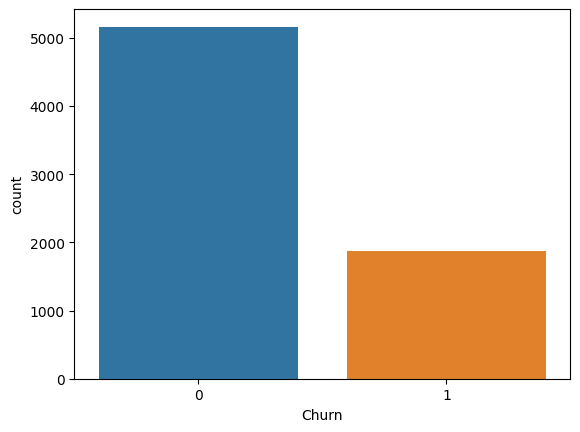

In [216]:
# Exploring the target variable
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

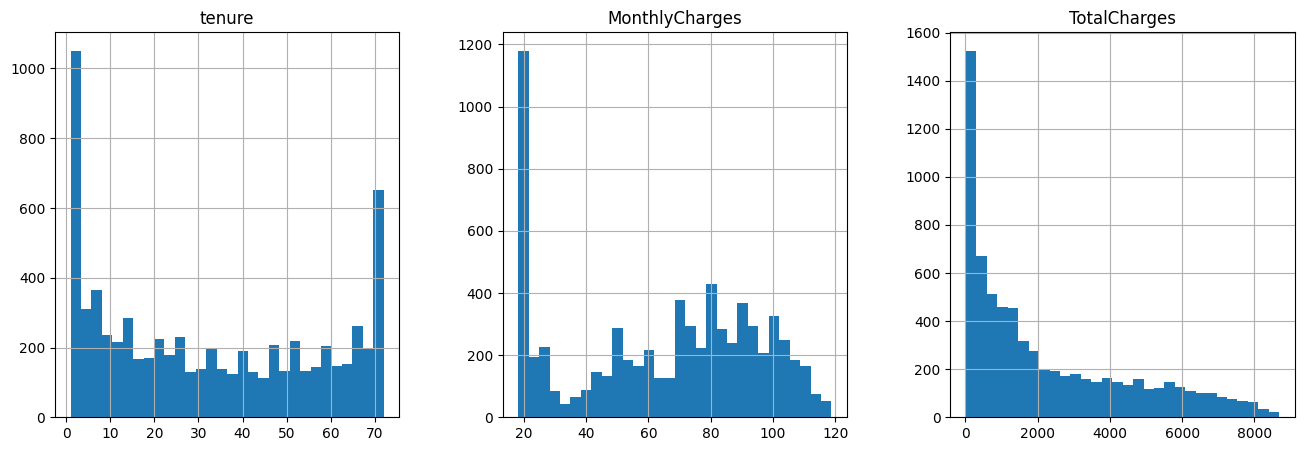

In [217]:
# Exploring the distribution of numeric features
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].hist(bins=30, figsize=(16, 5), layout=(1, 3))

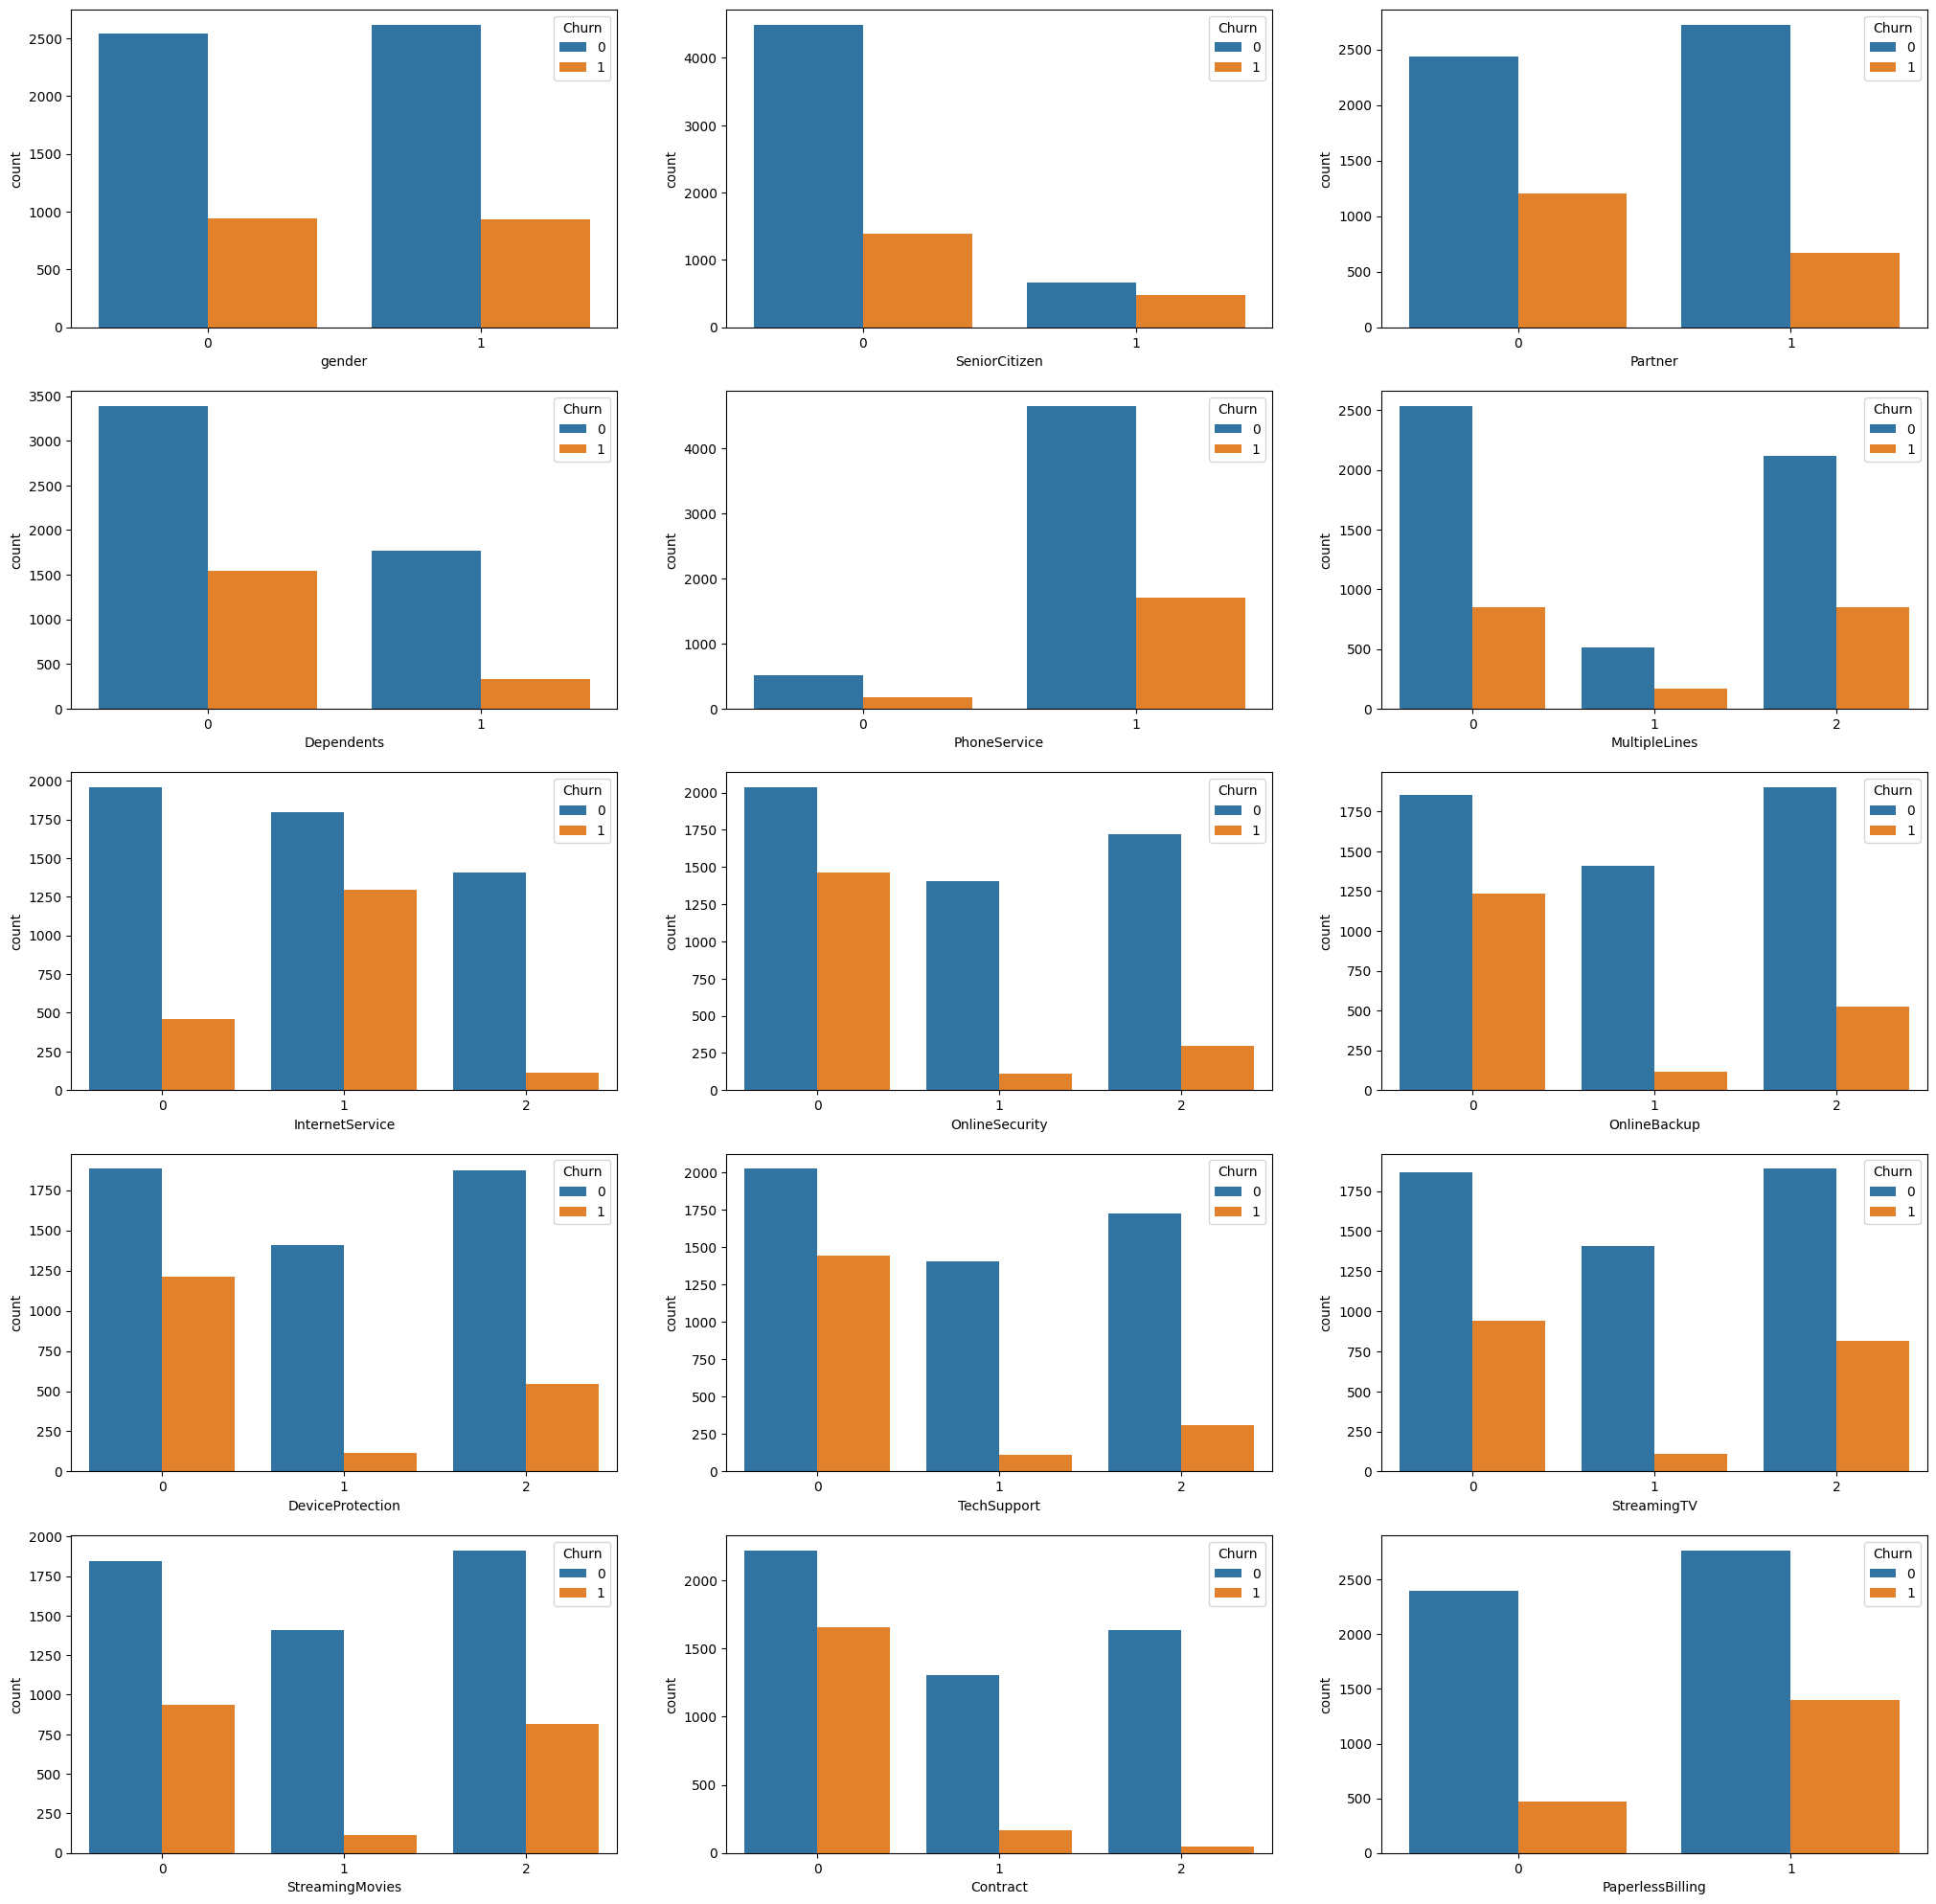

In [218]:
# Exploring the categorical features
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling']

fig, axes = plt.subplots(5, 3, figsize=(25, 25))
for cat, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="Churn", ax=ax)

<Axes: xlabel='PaymentMethod', ylabel='count'>

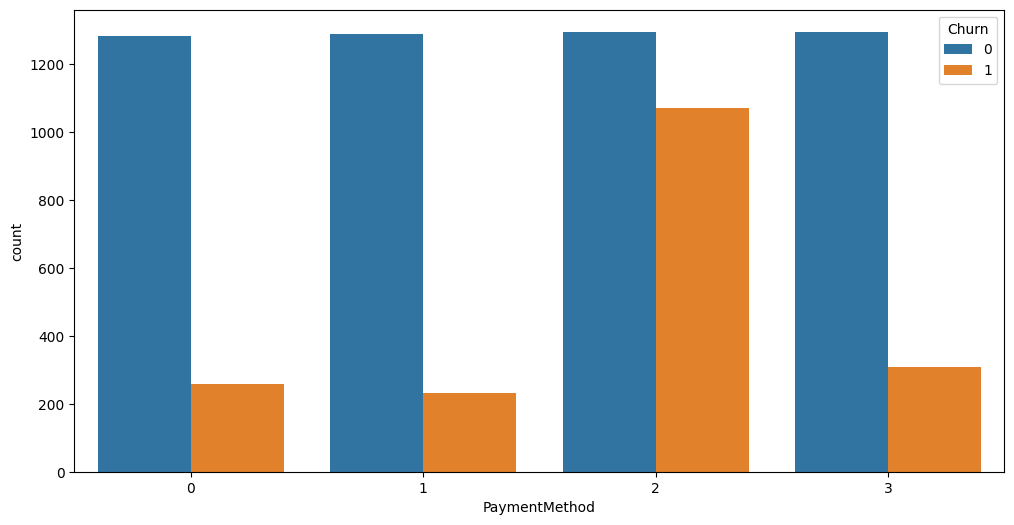

In [219]:
# Exploring the relationship between the categorical features (payment method)
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)

<Axes: >

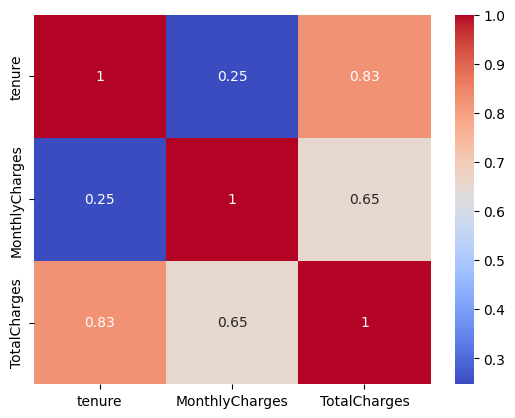

In [220]:
# Checking the correlation between numeric features
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Churn', ylabel='tenure'>

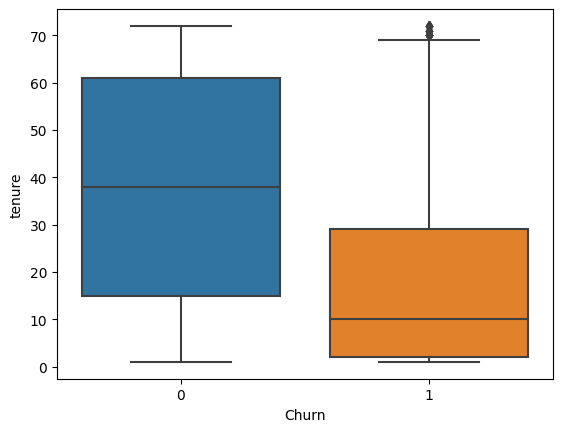

In [221]:
# Exploring the relationship between tenure and churn
sns.boxplot(x='Churn', y='tenure', data=df)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

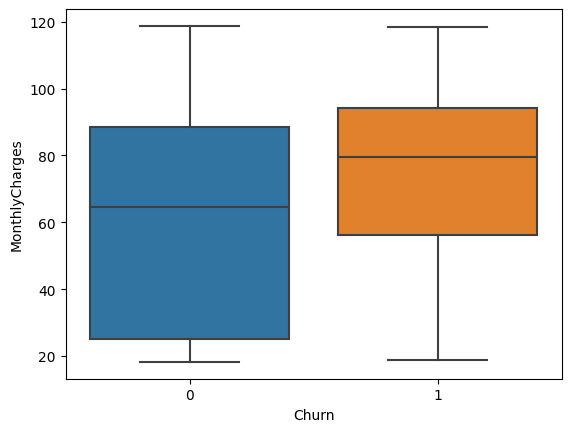

In [222]:
# Exploring the relationship between monthly charges and churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

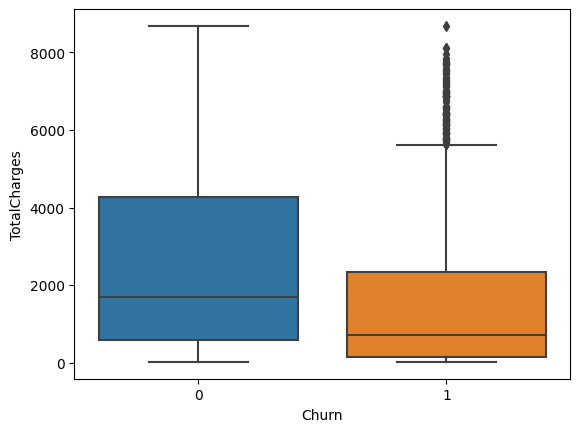

In [223]:
# Exploring the relationship between monthly charges and churn
sns.boxplot(x='Churn', y='TotalCharges', data=df)

<Axes: xlabel='tenure', ylabel='Density'>

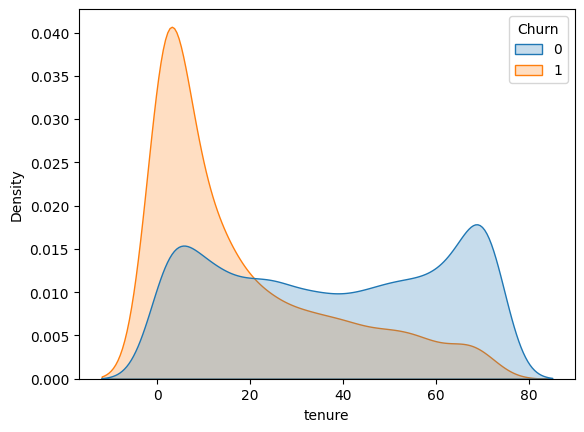

In [224]:
# Checking the impact of tenure on churn
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

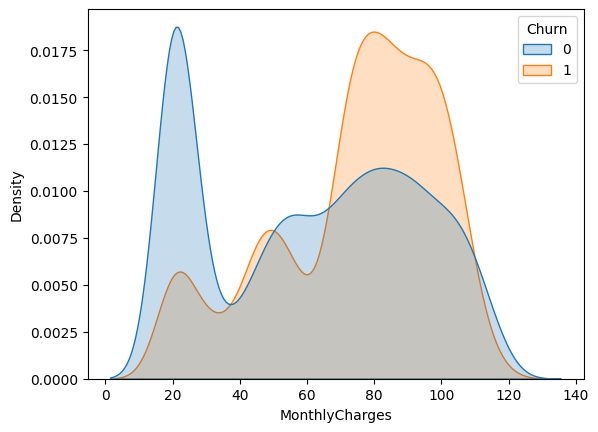

In [225]:
# Checking the impact of monthly charges on churn
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)

<Axes: xlabel='TotalCharges', ylabel='Density'>

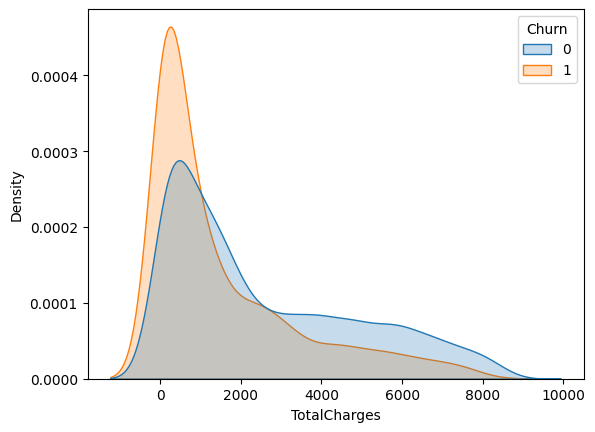

In [226]:
# Checking the impact of total charges on churn
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False)

<Figure size 1200x600 with 0 Axes>

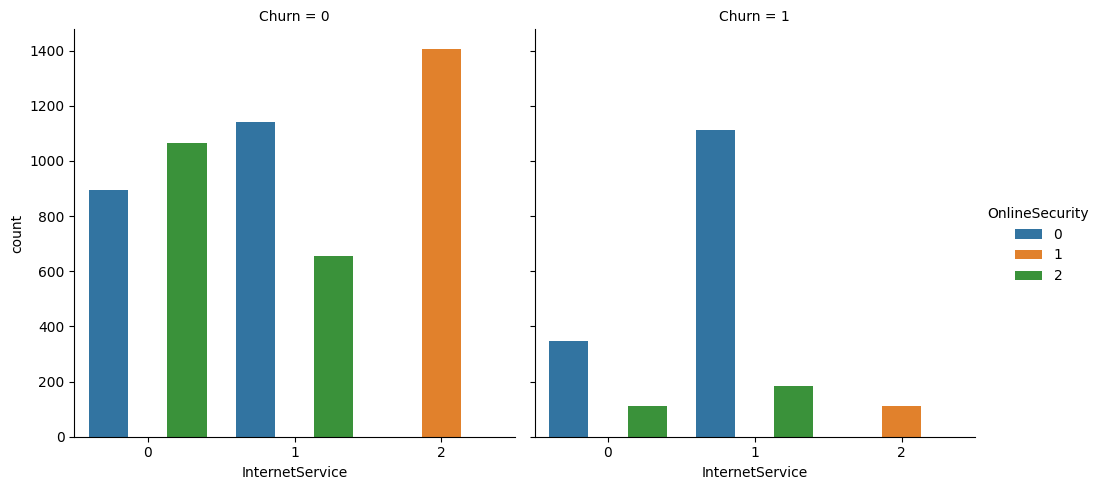

<Figure size 1200x600 with 0 Axes>

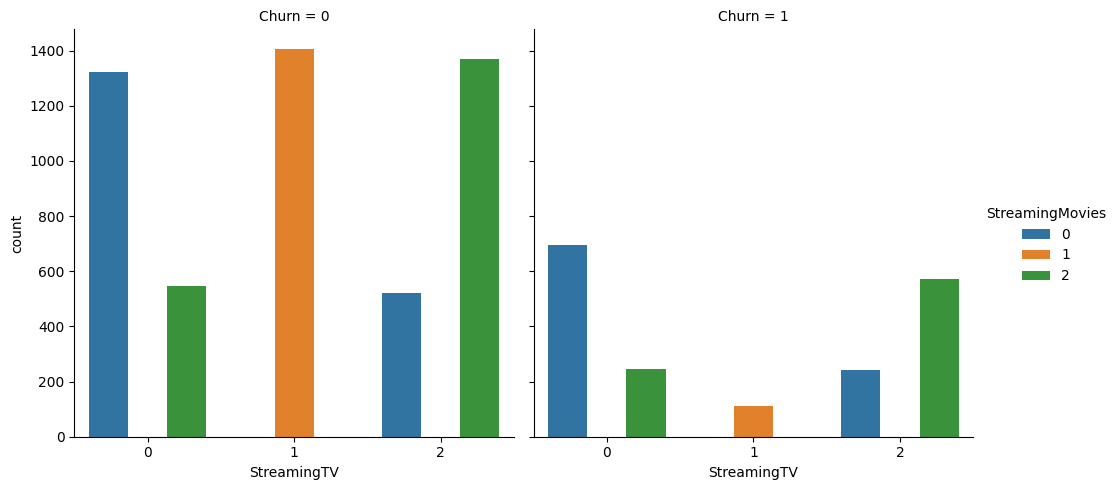

In [227]:
# Checking the churn rate by combinations of features
combinations = [('InternetService', 'OnlineSecurity'), ('StreamingTV', 'StreamingMovies')]

for combination in combinations:
    plt.figure(figsize=(12, 6))
    sns.catplot(x=combination[0], hue=combination[1], col='Churn', kind='count', data=df)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

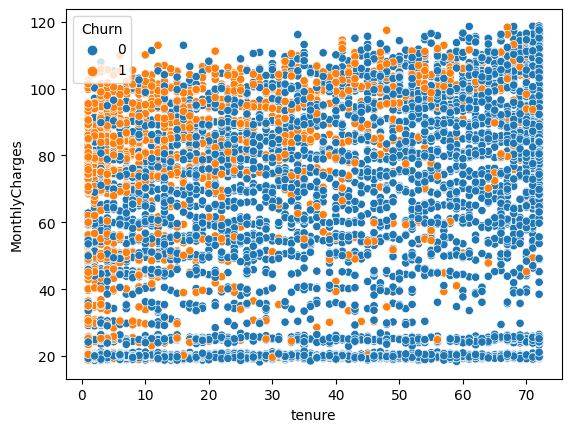

In [228]:
# Exploring the relationship between tenure and monthly charges by churn
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)

<Axes: xlabel='tenure', ylabel='TotalCharges'>

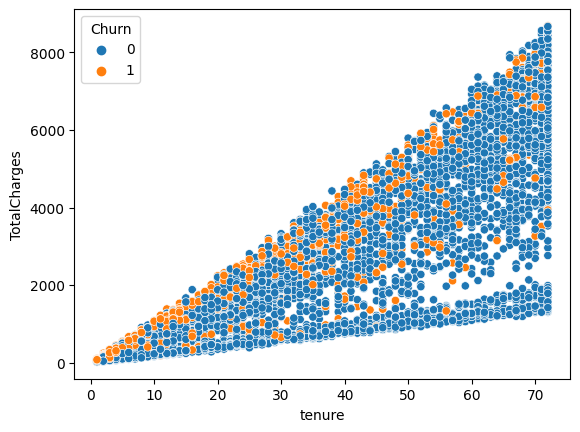

In [229]:
# Exploring the relationship between tenure and total charges by churn
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

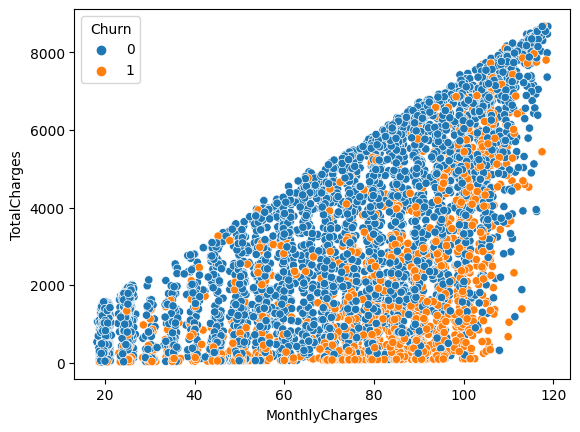

In [230]:
# Exploring the distribution of monthly charges and total charges by churn
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)

<Axes: xlabel='Contract', ylabel='tenure'>

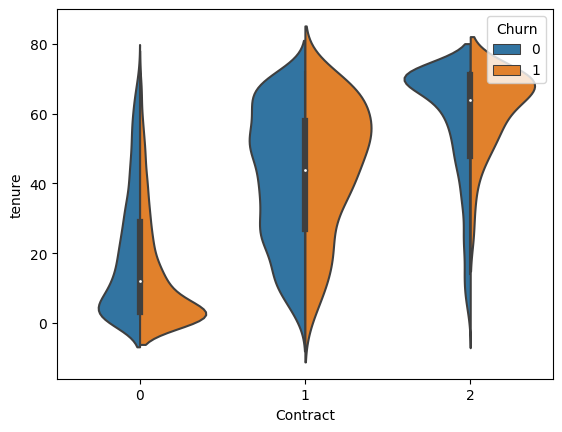

In [231]:
# Exploring the distribution of churn by tenure and contract type
sns.violinplot(x='Contract', y='tenure', hue='Churn', split=True, data=df)

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

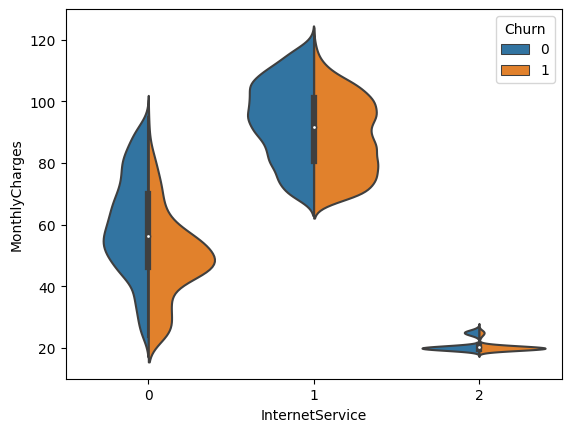

In [232]:
# Exploring the distribution of churn by monthly charges and internet service
sns.violinplot(x='InternetService', y='MonthlyCharges', hue='Churn', split=True, data=df)

<Axes: xlabel='PaymentMethod', ylabel='TotalCharges'>

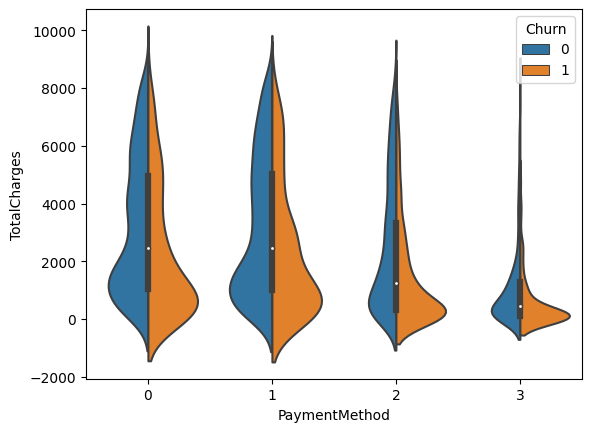

In [233]:
# Exploring the distribution of churn by payment method and total charges
sns.violinplot(x='PaymentMethod', y='TotalCharges', hue='Churn', split=True, data=df)

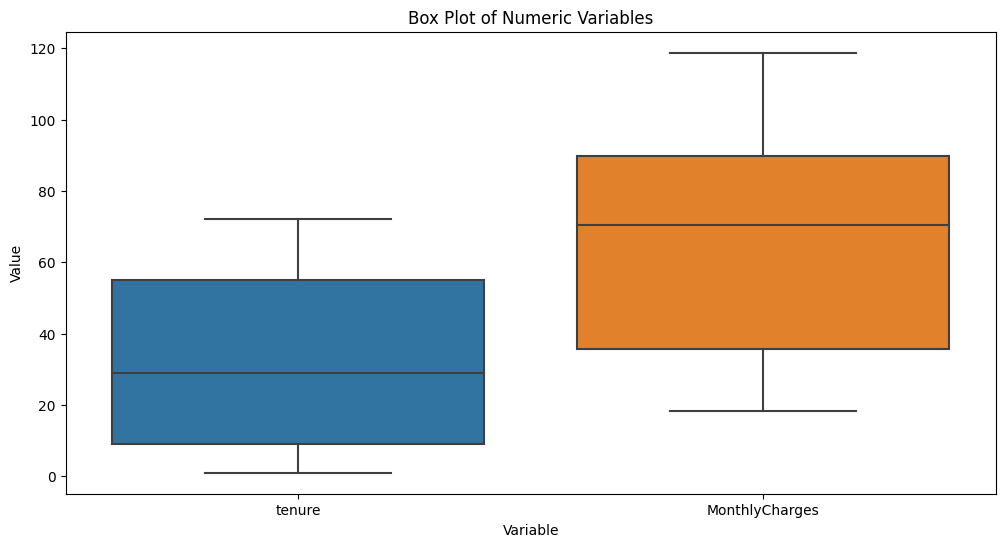

In [234]:
# Selecting numeric columns
numeric_cols = ['tenure', 'MonthlyCharges']

# Creating box plots for numeric variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plot of Numeric Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

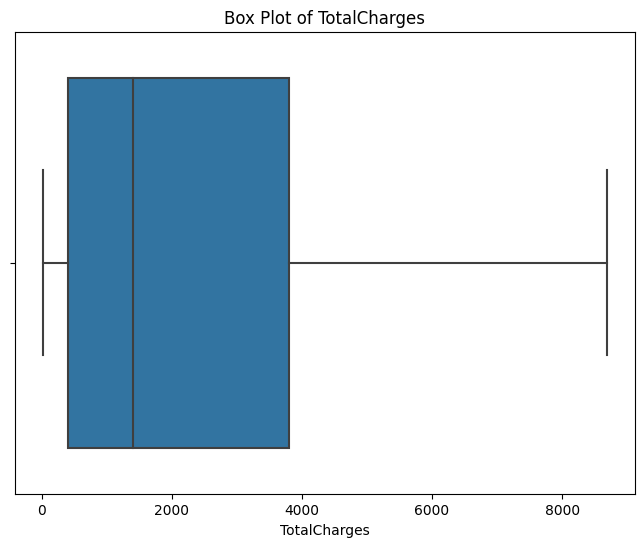

In [235]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot of TotalCharges')
plt.xlabel('TotalCharges')
plt.show()

# **Phase 1: Simple Model**

## Feature Engineering

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [237]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

for feature in categorical_features:
    unique_categories = df[feature].nunique()
    print(f"'{feature}' features have {unique_categories} categories.")

In [238]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

In [239]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Dataset Splitting

In [240]:
X = df.drop(columns="Churn")
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessor

In [250]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
binary_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('binary', 'passthrough', binary_features)
])

## Random Forest

In [242]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [3, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': [None, {0: 0.2, 1: 0.8}]
}

In [243]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

print("Best parameters: ", rf_grid_search.best_params_)
print("Best cross-validation score: ", rf_grid_search.best_score_)
accuracy = rf_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_rf = rf_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score:  0.8049777777777777
Accuracy on test set:  0.7896233120113717

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### Confusion Matrix

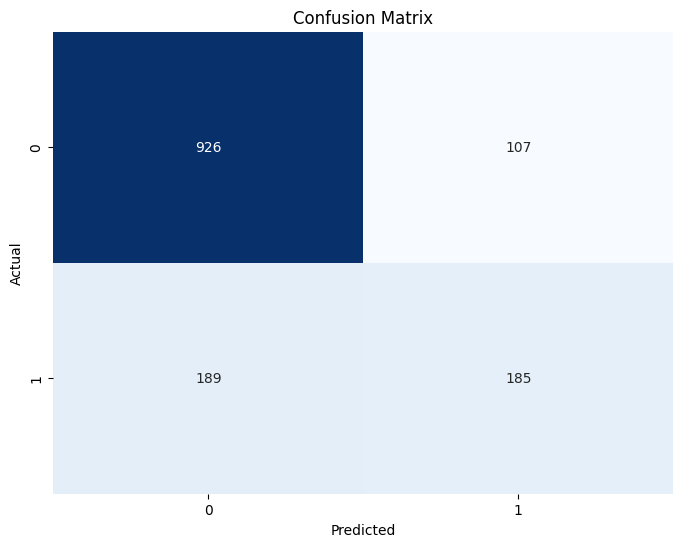

In [244]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

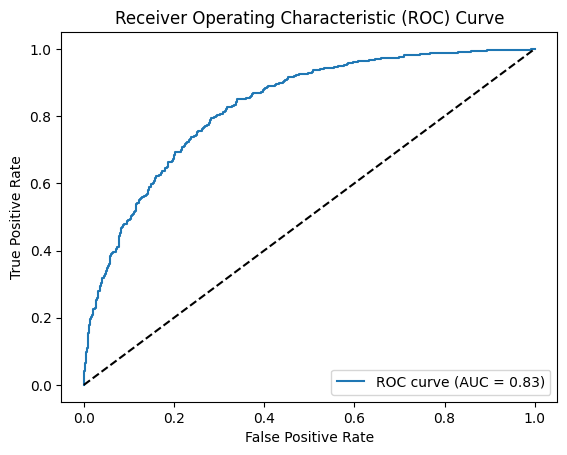

In [245]:
# ROC curve
y_prob = rf_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

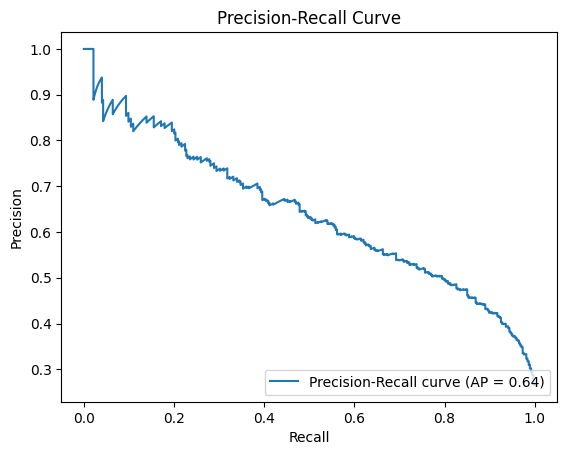

In [246]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [59]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

xgb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}


In [60]:
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters: ", xgb_grid_search.best_params_)
print("Best cross-validation score: ", xgb_grid_search.best_score_)
accuracy = xgb_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_xgb = xgb_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_xgb)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best cross-validation score:  0.8058666666666665
Accuracy on test set:  0.7938877043354655

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## SVM Classifier

In [56]:
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

svc_param_grid = {
    'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto']
}

In [57]:
svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=5)
svc_grid_search.fit(X_train, y_train)

print("Best parameters: ", svc_grid_search.best_params_)
print("Best cross-validation score: ", svc_grid_search.best_score_)
accuracy = svc_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_svc = svc_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_svc)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best cross-validation score:  0.802311111111111
Accuracy on test set:  0.7839374555792467

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



## Logistic Regression

In [ ]:
logr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

logr_param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga']
}

In [ ]:
logr_grid_search = GridSearchCV(logr_pipeline, logr_param_grid, cv=5)
logr_grid_search.fit(X_train, y_train)

print("Best parameters: ", logr_grid_search.best_params_)
print("Best cross-validation score: ", logr_grid_search.best_score_)
accuracy = logr_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_logr = logr_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_logr)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation score:  0.8074666666666668
Accuracy on test set:  0.7889125799573561

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Ada Boost

In [ ]:
ada_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])

ada_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.1, 0.5, 1.0]
}

In [ ]:
ada_grid_search = GridSearchCV(ada_pipeline, ada_param_grid, cv=5)
ada_grid_search.fit(X_train, y_train)

print("Best parameters: ", ada_grid_search.best_params_)
print("Best cross-validation score: ", ada_grid_search.best_score_)
accuracy = ada_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred = ada_grid_search.predict(X_test)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Best cross-validation score:  0.8076444444444444
Accuracy on test set:  0.7882018479033405

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Cat Boost

In [ ]:
catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(verbose=False))
])

catboost_param_grid = {
    'classifier__iterations': [100, 200, 300],
    'classifier__learning_rate': [0.001, 0.01, 0.1],
    'classifier__depth': [2, 3, 4]
}

In [ ]:
catboost_grid_search = GridSearchCV(catboost_pipeline, catboost_param_grid, cv=5)
catboost_grid_search.fit(X_train, y_train)

print("Best parameters: ", catboost_grid_search.best_params_)
print("Best cross-validation score: ", catboost_grid_search.best_score_)
accuracy = catboost_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred = catboost_grid_search.predict(X_test)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__depth': 3, 'classifier__iterations': 100, 'classifier__learning_rate': 0.1}
Best cross-validation score:  0.8092473294451663
Accuracy on test set:  0.7945984363894811

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## LightGBM

In [ ]:
lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier())
])

lgbm_param_grid = {
    'classifier__num_leaves': [20, 30, 40],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_samples': [10, 20, 30],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]
}

In [ ]:
lgbm_grid_search = GridSearchCV(lgbm_pipeline, lgbm_param_grid, cv=5)
lgbm_grid_search.fit(X_train, y_train)

print("Best parameters: ", lgbm_grid_search.best_params_)
print("Best cross-validation score: ", lgbm_grid_search.best_score_)
accuracy = lgbm_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred = lgbm_grid_search.predict(X_test)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_child_samples': 30, 'classifier__num_leaves': 20, 'classifier__subsample': 0.8}
Best cross-validation score:  0.8072888888888888
Accuracy on test set:  0.7896233120113717

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Voting

In [ ]:
# Definisikan estimator yang akan digunakan dalam ensambel
estimators = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('xgboost', XGBClassifier())
]

# Voting Classifier
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting', VotingClassifier(estimators=estimators))
])

voting_param_grid = {
    'voting__weights': [[1, 1, 1], [1, 2, 2], [2, 1, 1]]
}

In [ ]:
voting_grid_search = GridSearchCV(voting_pipeline, voting_param_grid, cv=5)
voting_grid_search.fit(X_train, y_train)

print("Best parameters (Voting): ", voting_grid_search.best_params_)
print("Best cross-validation score (Voting): ", voting_grid_search.best_score_)
accuracy_voting = voting_grid_search.score(X_test, y_test)
print("Accuracy on test set (Voting): ", accuracy_voting)

# Classification report for Voting Classifier
y_pred_voting = voting_grid_search.predict(X_test)
report_voting = classification_report(y_test, y_pred_voting)
print("\nClassification Report (Voting):")
print(report_voting)

Best parameters (Voting):  {'voting__weights': [2, 1, 1]}
Best cross-validation score (Voting):  0.8044444444444444
Accuracy on test set (Voting):  0.7924662402274343

Classification Report (Voting):
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.45      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



## Stacking

In [ ]:
estimators = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('xgboost', XGBClassifier())
]

# Stacking Classifier
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()))
])

stacking_param_grid = {
    'stacking__final_estimator__C': [0.1, 1, 10]
}

In [ ]:
stacking_grid_search = GridSearchCV(stacking_pipeline, stacking_param_grid, cv=5)
stacking_grid_search.fit(X_train, y_train)

print("Best parameters (Stacking): ", stacking_grid_search.best_params_)
print("Best cross-validation score (Stacking): ", stacking_grid_search.best_score_)
accuracy_stacking = stacking_grid_search.score(X_test, y_test)
print("Accuracy on test set (Stacking): ", accuracy_stacking)

# Classification report for Stacking Classifier
y_pred_stacking = stacking_grid_search.predict(X_test)
report_stacking = classification_report(y_test, y_pred_stacking)
print("\nClassification Report (Stacking):")
print(report_stacking)

Best parameters (Stacking):  {'stacking__final_estimator__C': 10}
Best cross-validation score (Stacking):  0.8071111111111111
Accuracy on test set (Stacking):  0.798862828713575

Classification Report (Stacking):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



# **Phase 2: Feature Importance**

## Feature Importance

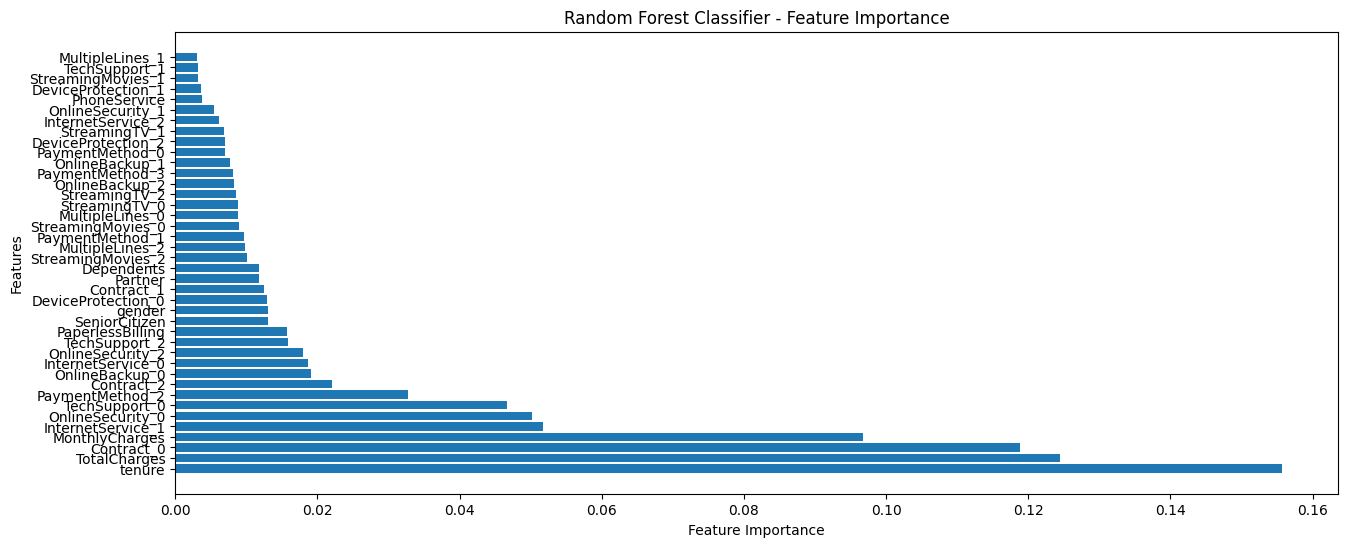

In [260]:
import matplotlib.pyplot as plt

numeric_features_names = rf_grid_search.best_estimator_['preprocessor'].transformers_[0][2]
encoded_categories = rf_grid_search.best_estimator_['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
categorical_features_names = list(encoded_categories)

feature_names = list(numeric_features_names) + categorical_features_names + list(binary_features)
importances = rf_grid_search.best_estimator_['classifier'].feature_importances_

sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(15, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

In [261]:
feature_importance = ['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract', 'OnlineSecurity', 'TechSupport', 'PaymentMethod', 'InternetService', 'Churn']

df_feature_importance = df[feature_importance].copy()
df_feature_importance.head()

,TotalCharges,tenure,MonthlyCharges,Contract,OnlineSecurity,TechSupport,PaymentMethod,InternetService,Churn
0,29.85,1,29.85,0,0,0,2,0,0
1,1889.50,34,56.95,1,2,0,3,0,0
2,108.15,2,53.85,0,2,0,3,0,1
3,1840.75,45,42.30,1,2,2,0,0,0
4,151.65,2,70.70,0,0,0,2,1,1


## Dataset Splitting

In [262]:
X = df_feature_importance.drop(columns="Churn")
y = df_feature_importance.Churn

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(7032, 8)
(7032,)


## Preprocessor

In [263]:
numeric_features = ['TotalCharges', 'tenure', 'MonthlyCharges']
categorical_features = ['Contract', 'TechSupport', 'PaymentMethod', 'InternetService']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## Random Forest

In [264]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [3, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': [None, {0: 0.2, 1: 0.8}]
}

In [265]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

print("Best parameters: ", rf_grid_search.best_params_)
print("Best cross-validation score: ", rf_grid_search.best_score_)
accuracy = rf_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_rf = rf_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation score:  0.7998222222222223
Accuracy on test set:  0.7782515991471215

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



### Confusion Matrix

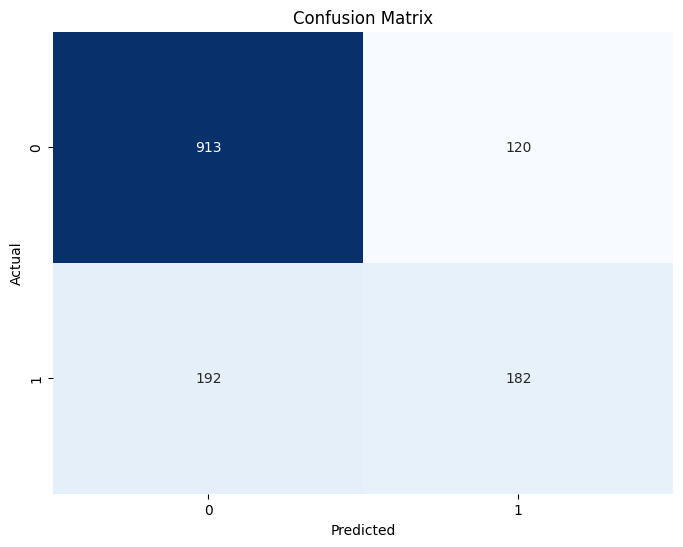

In [266]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

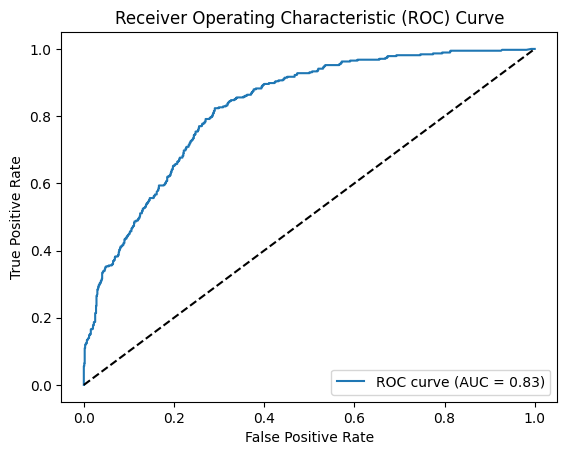

In [267]:
# ROC curve
y_prob = rf_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

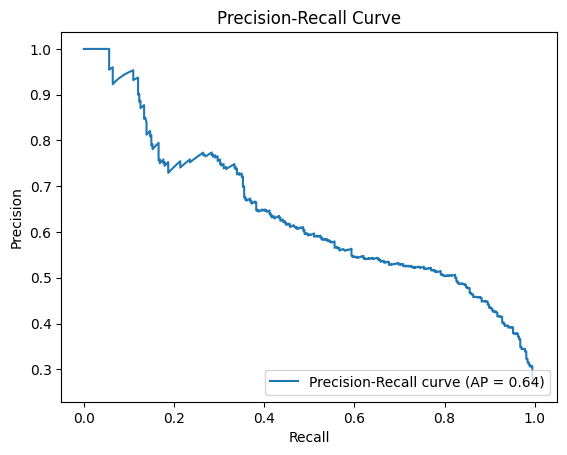

In [268]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## SVM Classifier

In [126]:
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

svc_param_grid = {
    'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto']
}

In [127]:
svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=5)
svc_grid_search.fit(X_train, y_train)

print("Best parameters: ", svc_grid_search.best_params_)
print("Best cross-validation score: ", svc_grid_search.best_score_)
accuracy = svc_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_svc = svc_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_svc)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation score:  0.8012444444444444
Accuracy on test set:  0.7803837953091685

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



### Confusion Matrix

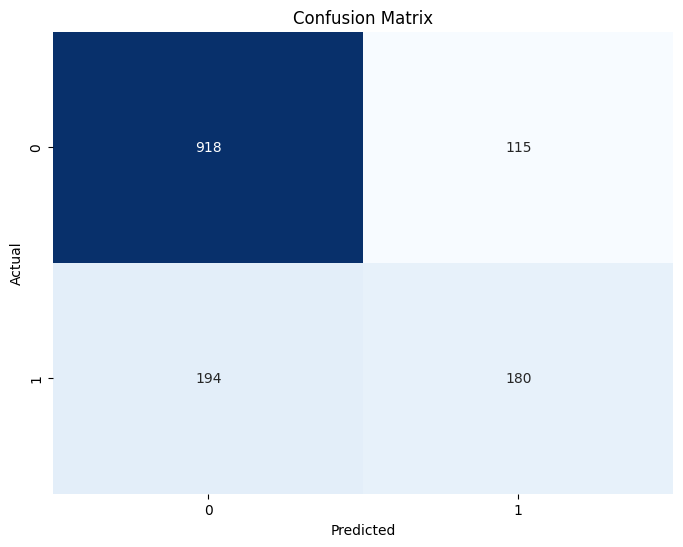

In [128]:
cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

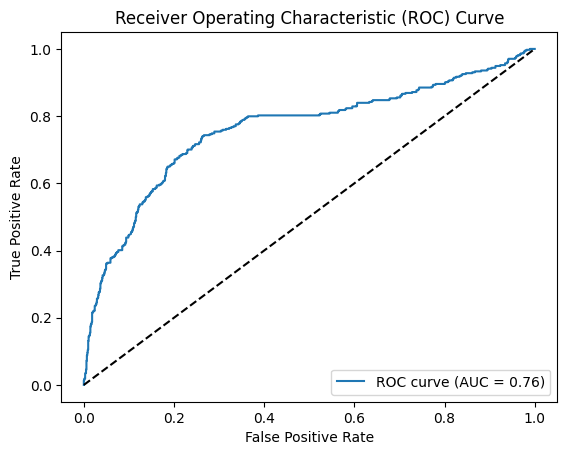

In [129]:
# ROC curve
y_prob = svc_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

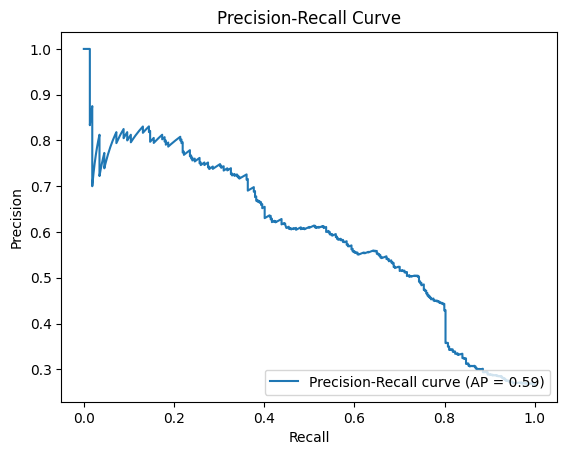

In [130]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Stacking

In [57]:
estimators = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('xgboost', XGBClassifier())
]

# Stacking Classifier
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()))
])

stacking_param_grid = {
    'stacking__final_estimator__C': [0.1, 1, 10]
}

In [58]:
stacking_grid_search = GridSearchCV(stacking_pipeline, stacking_param_grid, cv=5)
stacking_grid_search.fit(X_train, y_train)

print("Best parameters (Stacking): ", stacking_grid_search.best_params_)
print("Best cross-validation score (Stacking): ", stacking_grid_search.best_score_)
accuracy_stacking = stacking_grid_search.score(X_test, y_test)
print("Accuracy on test set (Stacking): ", accuracy_stacking)

# Classification report for Stacking Classifier
y_pred_stacking = stacking_grid_search.predict(X_test)
report_stacking = classification_report(y_test, y_pred_stacking)
print("\nClassification Report (Stacking):")
print(report_stacking)

Best parameters (Stacking):  {'stacking__final_estimator__C': 1}
Best cross-validation score (Stacking):  0.7998222222222223
Accuracy on test set (Stacking):  0.7903340440653873

Classification Report (Stacking):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# **Phase 3: Polynomial Features**

## SVM Classifier

In [59]:

svc_pipeline = Pipeline([
    ('preprocessor', preprocessor), # Run data splitting and preprocessor in phase 1
    ('classifier', SVC())
])

svc_param_grid = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__degree': [2, 3]
}

In [62]:
svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=5)
svc_grid_search.fit(X_train, y_train)

print("Best parameters: ", svc_grid_search.best_params_)
print("Best cross-validation score: ", svc_grid_search.best_score_)
accuracy = svc_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_svc = svc_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_svc)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__C': 0.1, 'classifier__degree': 3, 'classifier__gamma': 'scale', 'classifier__kernel': 'poly'}
Best cross-validation score:  0.8039111111111111
Accuracy on test set:  0.7931769722814499

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.43      0.53       374

    accuracy                           0.79      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



## Logistic Regression

In [139]:
logr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures()),
    ('classifier', LogisticRegression(max_iter=3000))
])

logr_param_grid = {
    'classifier__penalty': ['l2'],
    'classifier__C': [10],
    'classifier__solver': ['saga'],
    'polynomial_features__degree': [2]
}

In [140]:
logr_grid_search = GridSearchCV(logr_pipeline, logr_param_grid, cv=2, scoring='accuracy')
logr_grid_search.fit(X_train, y_train)

print("Best parameters: ", logr_grid_search.best_params_)
print("Best cross-validation score: ", logr_grid_search.best_score_)
accuracy = logr_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_logr = logr_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_logr)
print("\nClassification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters:  {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'polynomial_features__degree': 2}
Best cross-validation score:  0.7816902093966288
Accuracy on test set:  0.783226723525231

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.60      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



### Confusion Matrix

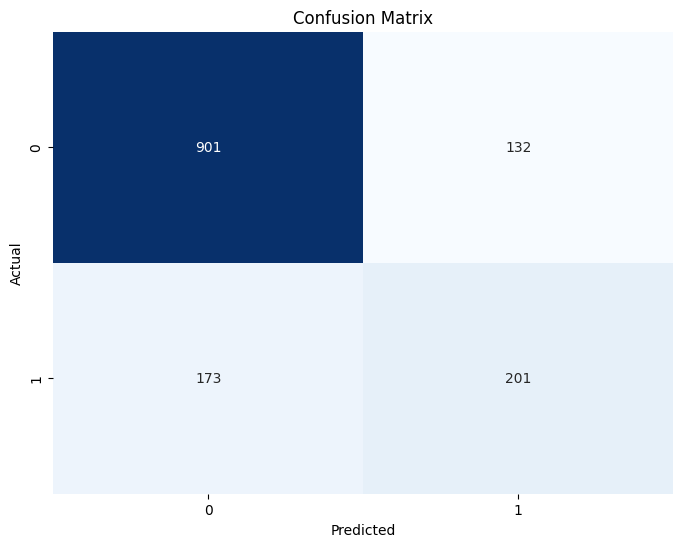

In [141]:
cm = confusion_matrix(y_test, y_pred_logr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

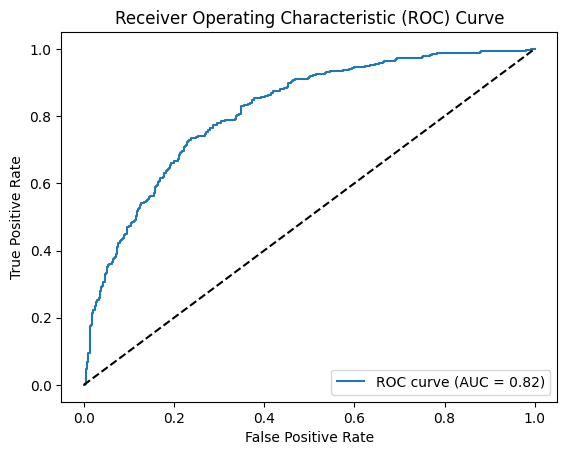

In [142]:
# ROC curve
y_prob = logr_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

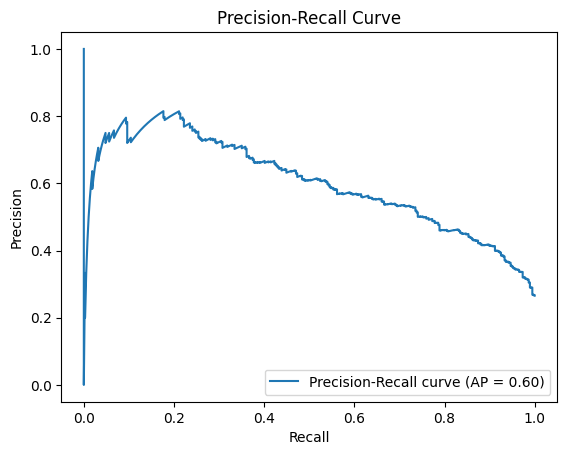

In [143]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [147]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures()),
    ('classifier', XGBClassifier())
])

xgb_param_grid = {
    'polynomial_features__degree': [2, 3],
    'classifier__n_estimators': [200],
    'classifier__max_depth': [3],
    'classifier__learning_rate': [0.1]
}


In [148]:
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters: ", xgb_grid_search.best_params_)
print("Best cross-validation score: ", xgb_grid_search.best_score_)
accuracy = xgb_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_xgb = xgb_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_xgb)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'polynomial_features__degree': 2}
Best cross-validation score:  0.800711111111111
Accuracy on test set:  0.7910447761194029

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### Confusion Matrix

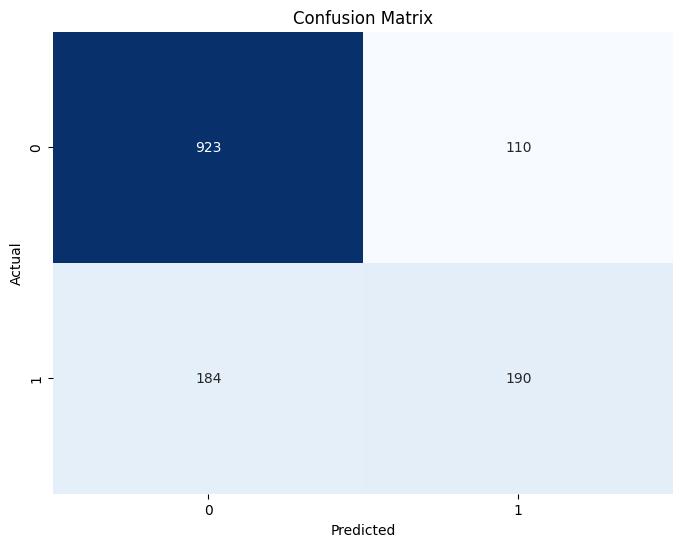

In [149]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

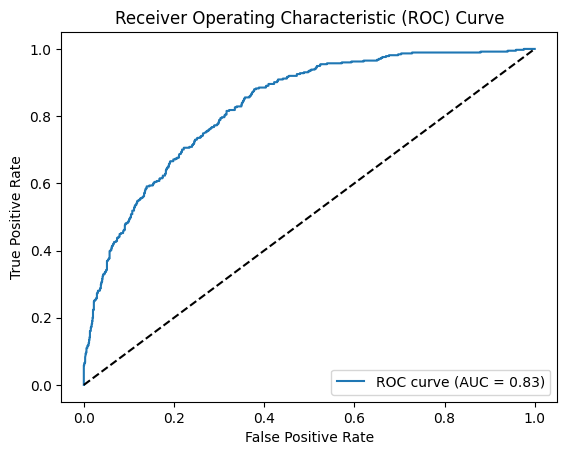

In [150]:
# ROC curve
y_prob = xgb_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

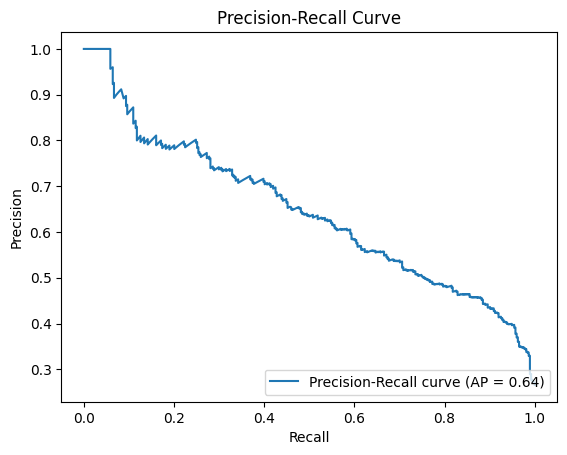

In [151]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# **Phase 4: Fine Tuning**

## XGBoost

In [152]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

xgb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]
}


In [153]:
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters: ", xgb_grid_search.best_params_)
print("Best cross-validation score: ", xgb_grid_search.best_score_)
accuracy = xgb_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Classification report
y_pred_xgb = xgb_grid_search.predict(X_test)
report = classification_report(y_test, y_pred_xgb)
print("\nClassification Report:")
print(report)

Best parameters:  {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 4, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best cross-validation score:  0.8074666666666668
Accuracy on test set:  0.7967306325515281

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### Confusion Matrix

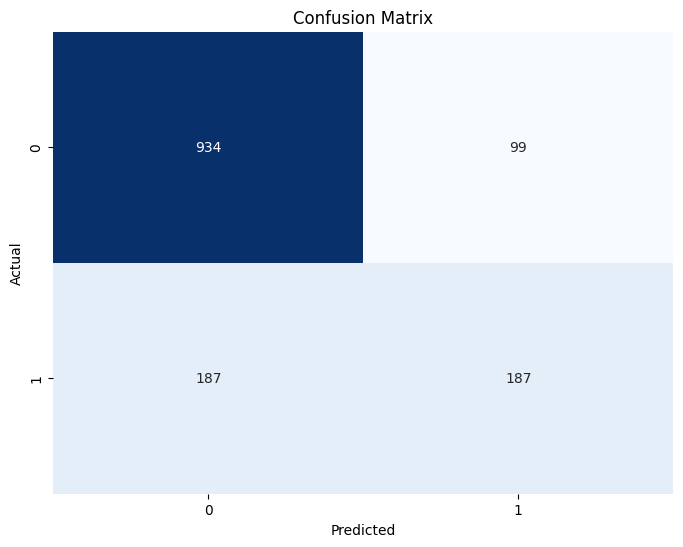

In [154]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

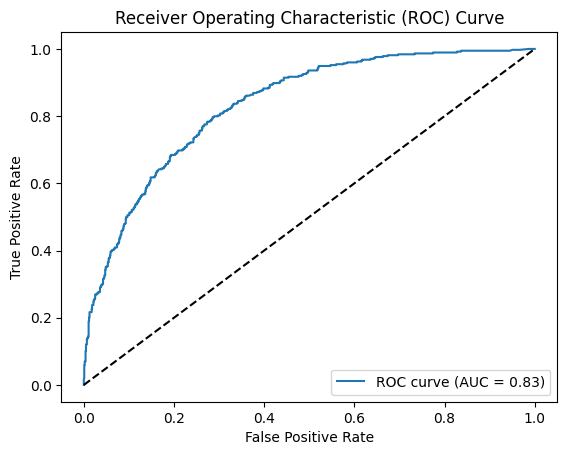

In [155]:
# ROC curve
y_prob = xgb_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

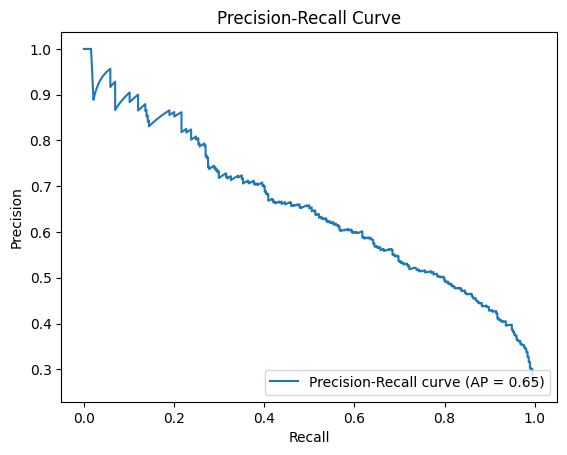

In [156]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Insight From Data / Business Recommendation


Based on the processing of the Telco customer churn dataset and the modeling results, here are some advice for the company to improve their business:

Customer Retention Strategies: Identify the key factors contributing to customer churn by analyzing the feature importance from the model. Focus on addressing these factors through targeted retention strategies. For example, if the model highlights that customers with no online security or backup services are more likely to churn, consider enhancing these services or offering incentives to encourage customers to opt for them.

Personalized Offers: Utilize the predictive capabilities of the model to create personalized offers or incentives for customers at high risk of churning. By understanding the characteristics and behaviors associated with churn, the company can tailor retention offers that are relevant and appealing to each customer segment.

Improve Service Quality: Investigate any potential issues or pain points identified by the analysis that may be leading to customer churn. For instance, if the model indicates that customers with a high number of support calls are more likely to churn, consider improving the quality and responsiveness of the support services to reduce customer dissatisfaction.

Contract and Pricing Analysis: Analyze the impact of contract duration and pricing on customer churn. Assess if there are any patterns indicating that customers on certain types of contracts or pricing plans are more likely to churn. Adjusting contract terms or pricing strategies based on these insights could help in retaining customers and optimizing revenue.

Enhanced Communication and Engagement: Develop strategies to improve customer engagement and communication. This can include regular and proactive communication with customers, offering personalized recommendations or discounts based on their usage patterns, and leveraging customer feedback to continuously enhance the overall customer experience.

Customer Segmentation: Utilize the churn prediction model to segment customers into different groups based on their churn probability. This segmentation can help tailor marketing campaigns, service offerings, and retention efforts specific to each segment's needs, increasing the effectiveness of these initiatives.

Monitor and Evaluate: Continuously monitor the impact of implemented strategies and evaluate their effectiveness in reducing churn. Regularly review churn rates, customer satisfaction scores, and other relevant metrics to assess the success of the implemented improvements. Make adjustments as necessary based on the feedback and insights gained from ongoing monitoring.

By implementing these recommendations, the company can aim to improve customer retention rates, reduce churn, and ultimately drive business growth and profitability. It's essential to consider these recommendations in the context of the company's resources, customer preferences, and industry dynamics to ensure their successful implementation.